In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from google
import pandas_datareader.data as web 

# For time stamps
from datetime import datetime

In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [4]:
for stock in tech_list:   
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [5]:
GOOG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-07,2468.000000,2441.072998,2451.320068,2466.090088,1192500,2466.090088
2021-06-08,2494.495117,2468.239990,2479.899902,2482.850098,1253000,2482.850098
2021-06-09,2505.000000,2487.330078,2499.500000,2491.399902,1006300,2491.399902
2021-06-10,2523.260010,2494.000000,2494.010010,2521.600098,1561700,2521.600098
2021-06-11,2526.989990,2498.290039,2524.919922,2513.929932,1262000,2513.929932
...,...,...,...,...,...,...
2022-05-27,2257.360107,2191.000000,2195.770020,2255.979980,1496200,2255.979980
2022-05-31,2328.669922,2251.449951,2261.580078,2280.780029,2565100,2280.780029
2022-06-01,2347.979980,2271.010010,2298.629883,2282.739990,1431500,2282.739990


In [6]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,2732.997638,2675.702219,2705.933080,2704.086196,1.303668e+06,2704.086196
std,199.609258,205.270833,204.105669,201.916485,5.381430e+05,201.916485
min,2127.899902,2044.160034,2102.840088,2116.790039,5.933000e+05,2116.790039
25%,2619.908752,2551.157532,2598.942444,2585.010071,9.461000e+05,2585.010071
50%,2768.175049,2714.890015,2742.252075,2740.405029,1.185400e+06,2740.405029
75%,2886.227478,2834.732483,2864.472534,2856.075073,1.512475e+06,2856.075073
max,3042.000000,2997.750000,3037.270020,3014.179932,4.487500e+06,3014.179932


In [7]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-06-07 to 2022-06-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    int64  
 5   Adj Close  252 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

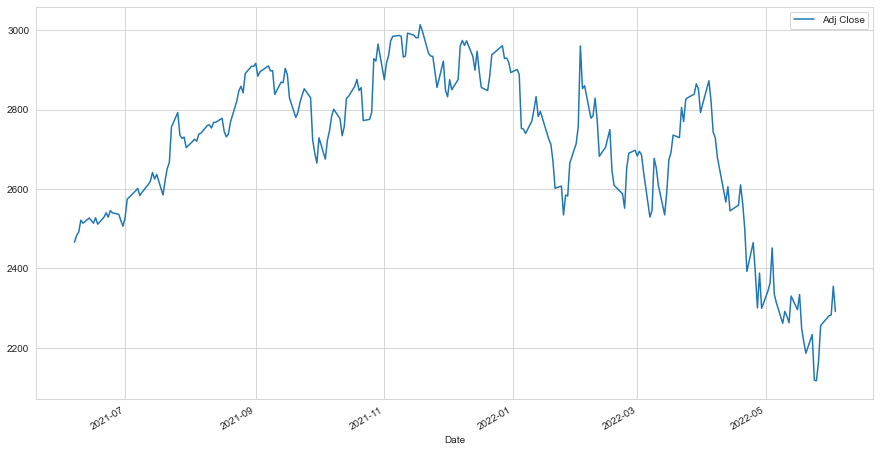

In [8]:
GOOG['Adj Close'].plot(legend=True , figsize=(15,8))

<AxesSubplot:xlabel='Date'>

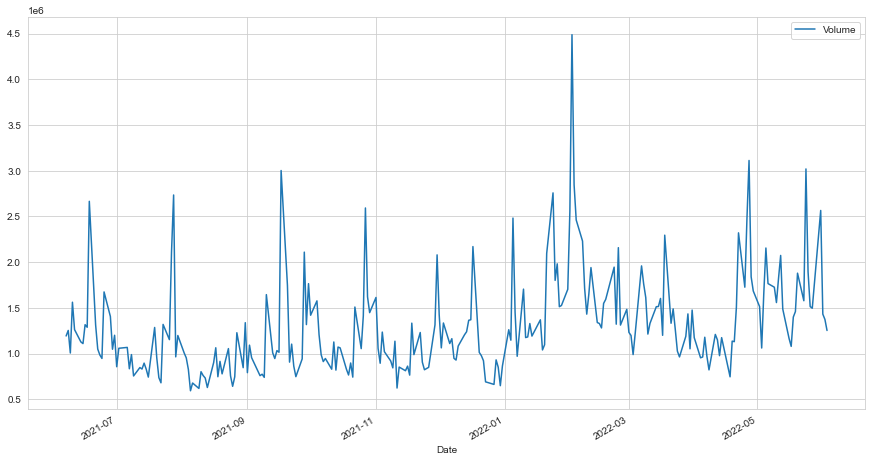

In [9]:
GOOG['Volume'].plot(legend=True , figsize=(15,8))

In [10]:
#plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    GOOG[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

<AxesSubplot:xlabel='Date'>

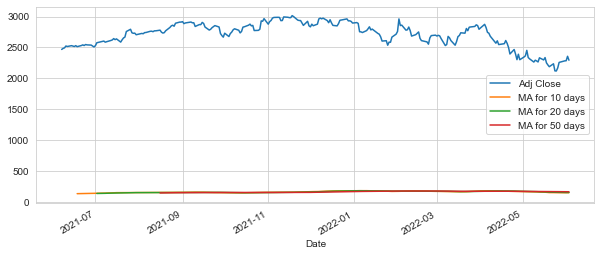

In [12]:
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [13]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()

In [16]:
GOOG['Daily Return'].head(10)

Date
2021-06-07         NaN
2021-06-08    0.006796
2021-06-09    0.003444
2021-06-10    0.012122
2021-06-11   -0.003042
2021-06-14    0.005215
2021-06-15   -0.002525
2021-06-16   -0.002670
2021-06-17    0.005366
2021-06-18   -0.006358
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

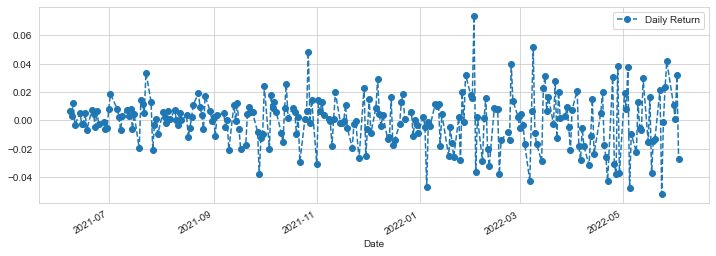

In [17]:
GOOG['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

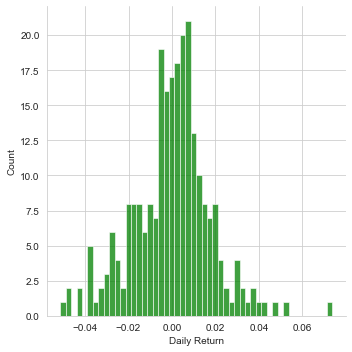

In [24]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.displot(GOOG['Daily Return'].dropna(),bins=50,color='green')

In [26]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
closing_df.head(10)

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-07,125.184792,2466.090088,251.754288,3198.010010
2021-06-08,126.020012,2482.850098,250.524338,3264.110107
2021-06-09,126.407799,2491.399902,251.536057,3281.149902
2021-06-10,125.393593,2521.600098,255.156509,3349.649902
2021-06-11,126.626556,2513.929932,255.801270,3346.830078
2021-06-14,129.738770,2527.040039,257.785065,3383.870117
2021-06-15,128.903549,2520.659912,256.267426,3383.129883
2021-06-16,129.410645,2513.929932,255.295349,3415.250000
2021-06-17,131.041321,2527.419922,258.786835,3489.239990


In [27]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

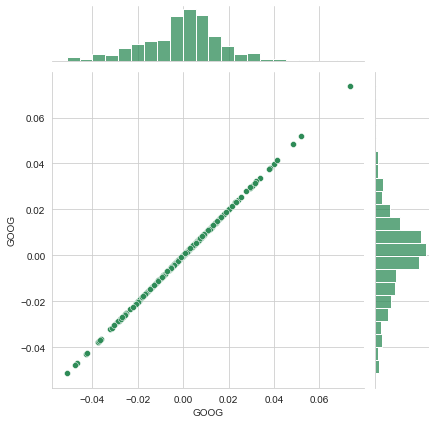

In [36]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

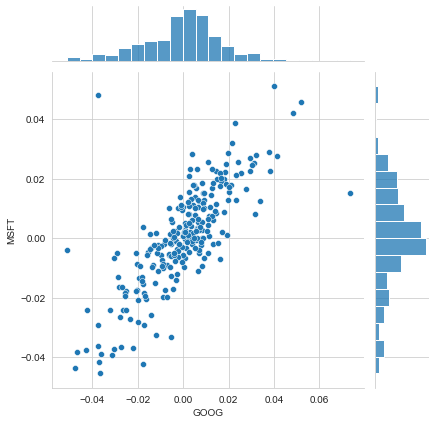

In [37]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')#comparing Google and Microsoft the same way.

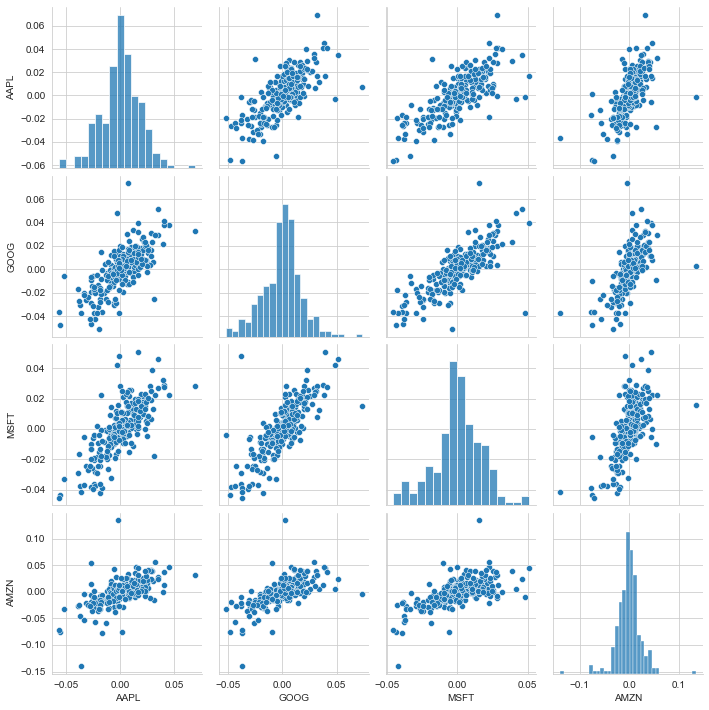

In [38]:
sns.pairplot(tech_rets.dropna()) #relationship between daily returns 

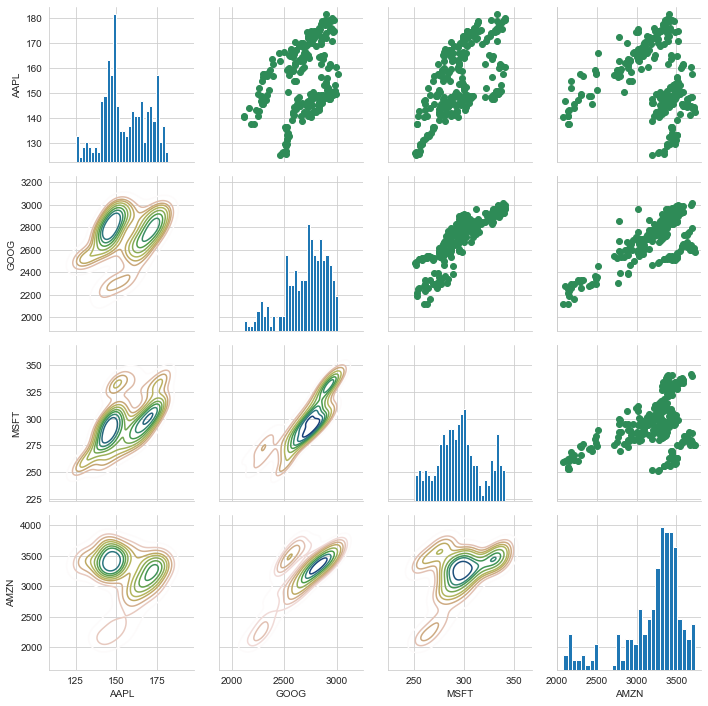

In [42]:
#correlation of the closing prices
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='seagreen')

# We can also define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='gist_earth_r')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)